In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Acer\Downloads\Placement_Dataset.csv")

In [3]:
df.head(10)

,CGPA,Score,Placed
0,6.5,65,1
1,7.2,72,1
2,8.0,80,1
3,5.8,58,0
4,9.1,91,1
5,7.5,75,1
6,6.9,69,0
7,8.4,84,1
8,5.5,55,0
9,9.0,90,1


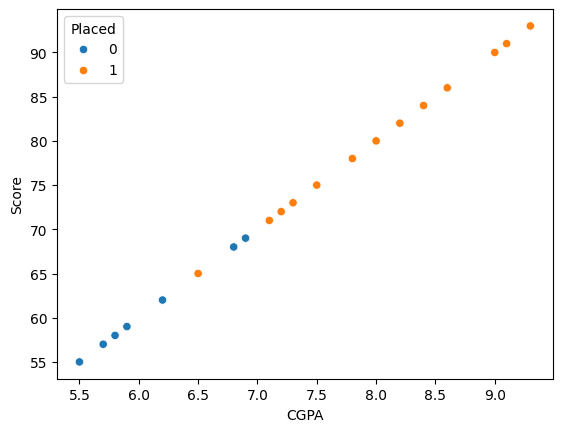

In [4]:
#CHECKING THAT IT IS LINEARLY SEPARABLE OR NOT
sns.scatterplot(x="CGPA",y="Score",data=df,hue="Placed")
plt.show()

In [5]:
x = df.iloc[:,:-1]
y = df["Placed"]

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

75.0

In [10]:
lr.predict([[7.2,72]])

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [11]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


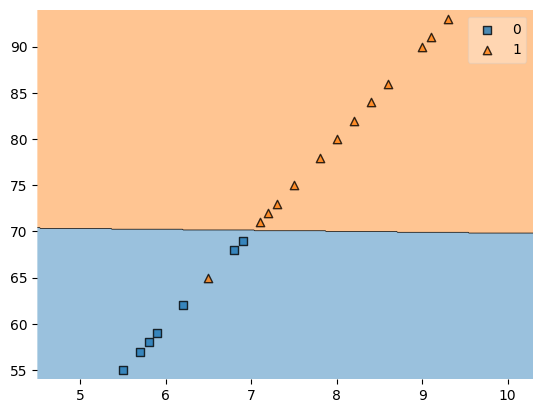

In [12]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

In [13]:
lr.coef_

array([[0.09767689, 0.97676888]])

In [14]:
lr.intercept_

array([-69.17557976])

In [17]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,classification_report,accuracy_score

In [20]:
cf=confusion_matrix(y_test,lr.predict(x_test))
cf

array([[0, 0],
       [1, 3]])

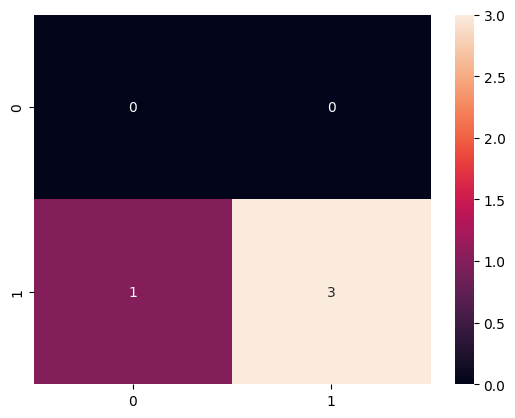

In [21]:
sns.heatmap(cf,annot=True)
plt.show()

In [23]:
precision_score(y_test,lr.predict(x_test))*100

100.0

In [46]:
recall_score(y_test,lr.predict(x_test))*100

75.0

In [25]:
f1_score(y_test,lr.predict(x_test))*100

85.71428571428571

In [47]:
accuracy=accuracy_score(y_test,lr.predict(x_test))

In [48]:
print(f"Accuracy: {accuracy * 100:.2f}%")
report = classification_report(y_test,lr.predict(x_test),target_names=df['Placed'].unique().astype(str))
print(report)

Accuracy: 75.00%
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           0       1.00      0.75      0.86         4

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4



C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Acer\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
